In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Runge-Kutta de 4ª ordem

In [ ]:
def RK4(a,b,h,r0,dr0,f):
  tpoints = np.arange(a,b,h)
  rpoints = []

  r = np.array([r0, dr0], dtype=float)
  for t in tpoints:
    rpoints.append(r[0])
    k1 = h*f(r,t)
    k2 = h*f(r + 0.5*k1,t + 0.5*h)
    k3 = h*f(r + 0.5*k2,t + 0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
  return tpoints, rpoints

# RLC - passa-banda

corrente:
$$ {d^2 \over dt}I(t) + {R \over L} {d \over dt} I(t) + {1 \over LC} I(t) = 0 $$

tensão
$$ V_{in} = LC{d^2 V_{out} \over dt^2} + RC{d V_{out} \over dt} + V_{out} $$

$$ {d^2 V_{out} \over dt} = {V_{in} - V_{out} \over LC} - {R \over L} {d V_{out} \over dt}   $$

In [ ]:
def Vin(t):
  return (Vpp/2)*np.sin(2*np.pi*freq*t)

def RLCcircuit(r,t):
  Vout = r[0]
  dVoutdt = r[1]
  d2Voutdt2 = (-Vout + Vin(t))/(L*C) - (R/L)*dVoutdt
  return np.array([dVoutdt, d2Voutdt2], dtype=float)

# RLC - Sinal temporal

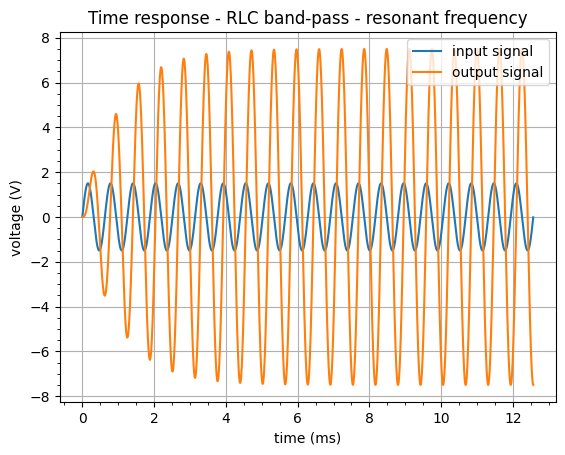

In [ ]:
R = 200  #ohms
C = 1e-7 #faraday
L = 0.1  #henry
Vpp = 3
freq = 1/(2*np.pi*np.sqrt(L*C))
a = 0    #s
b = 20/freq  #s
N = 10000
h = (b - a)/N

Vinpoints = []
tpoints = np.arange(a,b,h)

for t in (tpoints):
  Vinpoints.append(Vin(t))

rescaledt = [1000*t for t in tpoints]

plt.plot(rescaledt, Vinpoints, label='input signal')

#####################################################################################################################################################################

tpoints, Voutpoints = RK4(a,b,h,0,0,RLCcircuit)

plt.title('Time response - RLC band-pass - resonant frequency')
plt.xlabel('time (ms)')
plt.ylabel('voltage (V)')
plt.grid()
plt.minorticks_on()
plt.plot(rescaledt, Voutpoints, label='output signal')
plt.legend(loc='upper right')
plt.savefig('RLC-respt-cof.png', format='png')
plt.show()

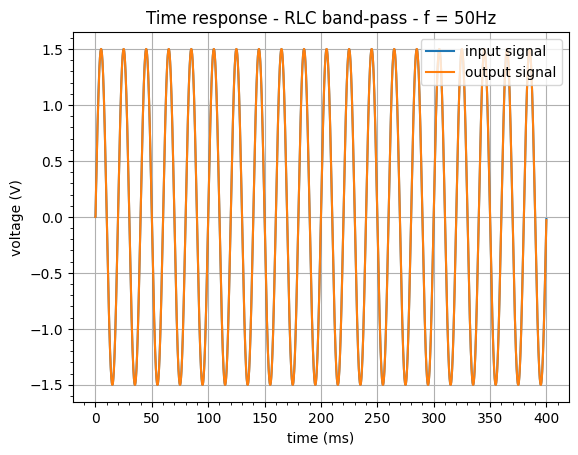

In [ ]:
R = 200  #ohms
C = 1e-7 #faraday
L = 0.1  #henry
Vpp = 3
freq = 50
a = 0    #s
b = 20/freq  #s
N = 10000
h = (b - a)/N

Vinpoints = []
tpoints = np.arange(a,b,h)

for t in (tpoints):
  Vinpoints.append(Vin(t))

rescaledt = [1000*t for t in tpoints]

plt.plot(rescaledt, Vinpoints, label='input signal')

#####################################################################################################################################################################

tpoints, Voutpoints = RK4(a,b,h,0,0,RLCcircuit)

plt.title('Time response - RLC band-pass - f = 50Hz')
plt.xlabel('time (ms)')
plt.ylabel('voltage (V)')
plt.grid()
plt.minorticks_on()
plt.plot(rescaledt, Voutpoints, label='output signal')
plt.legend(loc='upper right')
plt.savefig('RLC-respt-50.png', format='png')
plt.show()

# RLC - Sinal em frequêcia

In [ ]:
# constantes

Vpp = 3
a = 0    #s
R = 200  #ohms
C = 1e-6 #faraday
L = 0.1

In [ ]:
freqpoints = np.logspace(1,5,50)
Vfpoints = []

for freq in freqpoints:
  b = 2/freq
  N = 10000
  h = (b - a)/N
  tpoints, Voutpoints = RK4(a,b,h,0,0,RLCcircuit)
  Vfpoints.append(max(Voutpoints) - min(Voutpoints))

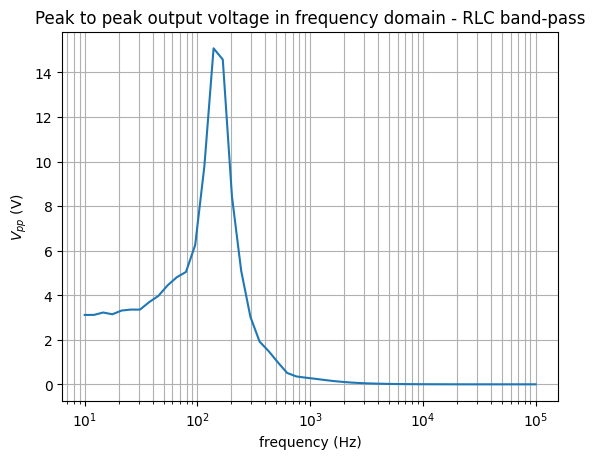

In [ ]:
plt.title('Peak to peak output voltage in frequency domain - RLC band-pass')
plt.xlabel('frequency (Hz)')
plt.ylabel(r'$V_{pp}$ (V)')
plt.grid(which='both')
plt.semilogx(freqpoints,Vfpoints)
plt.savefig('RLC-resp-frequencia.png', format='png')
plt.show()

# RLC - Capacitância variante

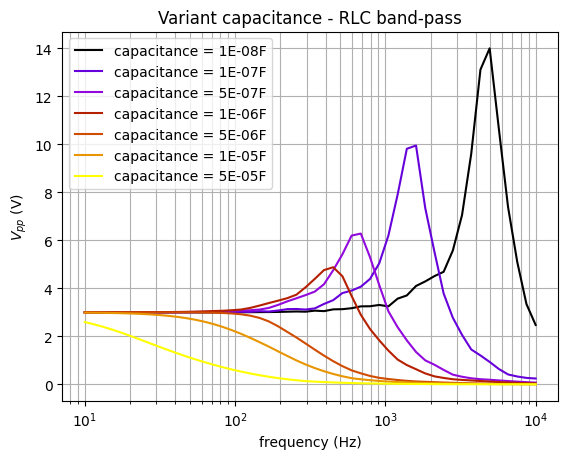

In [ ]:
# constantes

Vpp = 3
a = 0    #s
R = 200  #ohms
L = 0.1

colors = plt.cm.gnuplot(np.linspace(0, 1, 7))

for C, i in zip([1e-8, 1e-7, 5e-7, 1e-6, 5e-6, 1e-5, 5e-5], range(7)):
  freqpoints = np.logspace(1,4,50)
  Vfpoints = []

  for freq in freqpoints:
    b = 2/freq
    if C > 1.1e-7:
      N = 1000
    else:
      N = 10000
    h = (b - a)/N
    tpoints, Voutpoints = RK4(a,b,h,0,0,RLCcircuit)
    Vfpoints.append(max(Voutpoints) - min(Voutpoints))

  plt.semilogx(freqpoints,Vfpoints,label=f'capacitance = {C:.0E}F', color=colors[i])

plt.title('Variant capacitance - RLC band-pass')
plt.xlabel('frequency (Hz)')
plt.ylabel(r'$V_{pp}$ (V)')
plt.grid(which='both')
plt.legend()
plt.savefig('RLC-passa-banda-cap-var.png', format='png')
plt.show()

# RLC - Indutância variável

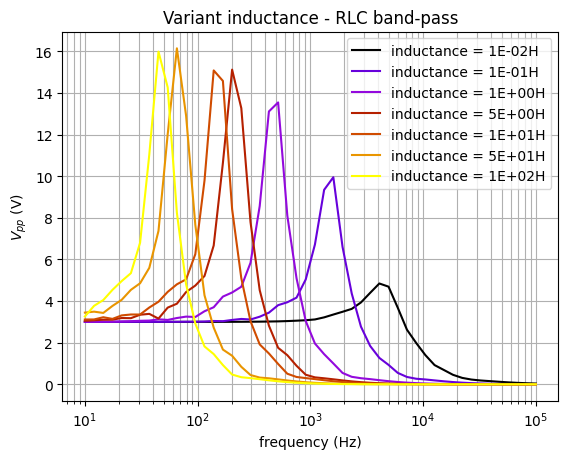

In [ ]:
# constantes

Vpp = 3
a = 0    #s
R = 200
C = 1e-7 #F

colors = plt.cm.gnuplot(np.linspace(0, 1, 7))

for L, i in zip([0.01, 0.1, 1, 5, 10, 50, 100], range(7)):
  freqpoints = np.logspace(1,5,50)
  Vfpoints = []

  for freq in freqpoints:
    b = 2/freq
    N = 10000
    h = (b - a)/N
    tpoints, Voutpoints = RK4(a,b,h,0,0,RLCcircuit)
    Vfpoints.append(max(Voutpoints) - min(Voutpoints))

  plt.semilogx(freqpoints,Vfpoints,label=f'inductance = {L:.0E}H', color=colors[i])

plt.title('Variant inductance - RLC band-pass')
plt.xlabel('frequency (Hz)')
plt.ylabel(r'$V_{pp}$ (V)')
plt.grid(which='both')
plt.legend()
plt.savefig('RLC-passa-banda-ind-var.png', format='png')
plt.show()

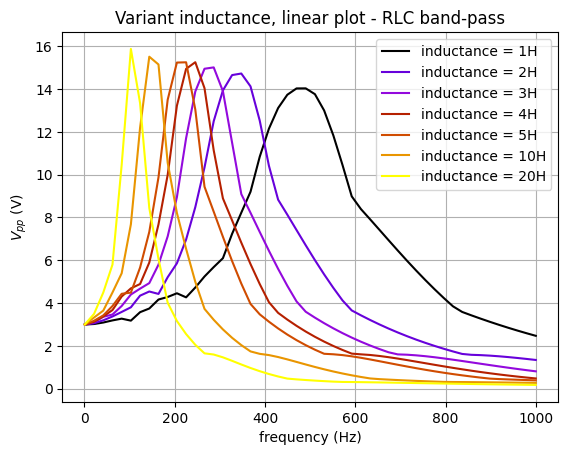

In [ ]:
# constantes

Vpp = 3
a = 0    #s
R = 200
C = 1e-7 #F

colors = plt.cm.gnuplot(np.linspace(0, 1, 7))

for L, i in zip([1, 2, 3, 4, 5, 10, 20], range(7)):
  freqpoints = np.linspace(1,1000,50)
  Vfpoints = []

  for freq in freqpoints:
    b = 2/freq
    N = 10000
    h = (b - a)/N
    tpoints, Voutpoints = RK4(a,b,h,0,0,RLCcircuit)
    Vfpoints.append(max(Voutpoints) - min(Voutpoints))

  plt.plot(freqpoints,Vfpoints,label=f'inductance = {L}H',color=colors[i])

plt.title('Variant inductance, linear plot - RLC band-pass')
plt.xlabel('frequency (Hz)')
plt.ylabel(r'$V_{pp}$ (V)')
plt.grid()
plt.legend()
plt.savefig('RLC-passa-banda-ind-var-lin.png', format='png')
plt.show()

# RLC - Resistência variável

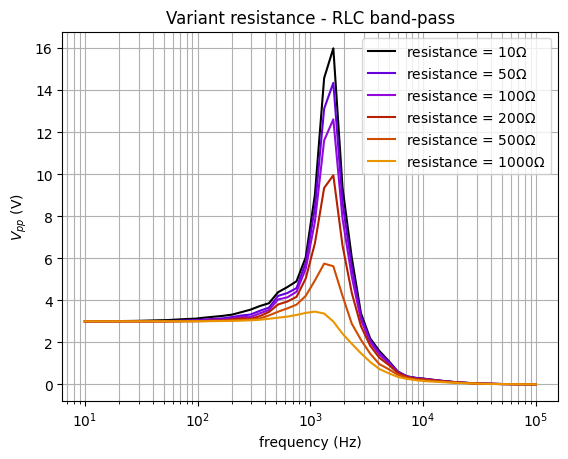

In [ ]:
# constantes

Vpp = 3
a = 0    #s
L = 0.1
C = 1e-7 #F

colors = plt.cm.gnuplot(np.linspace(0, 1, 7))

for R, i in zip([10, 50, 100, 200, 500, 1000], range(6)):
  freqpoints = np.logspace(1,5,50)
  Vfpoints = []

  for freq in freqpoints:
    b = 2/freq
    if R < 100:
      N = 10000
    else:
      N = 1000
    h = (b - a)/N
    tpoints, Voutpoints = RK4(a,b,h,0,0,RLCcircuit)
    Vfpoints.append(max(Voutpoints) - min(Voutpoints))

  plt.semilogx(freqpoints,Vfpoints,label=f'resistance = {R}$\Omega$',color=colors[i])

plt.title('Variant resistance - RLC band-pass')
plt.xlabel('frequency (Hz)')
plt.ylabel(r'$V_{pp}$ (V)')
plt.grid(which='both')
plt.legend()
plt.savefig('RLC-passa-banda-res-var.png', format='png')
plt.show()

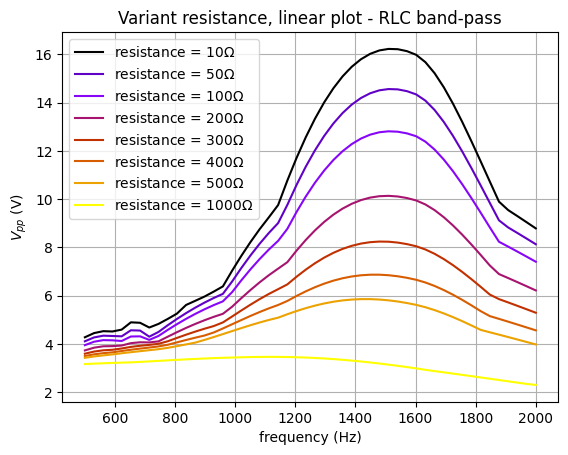

In [ ]:
# constantes

Vpp = 3
a = 0    #s
L = 0.1
C = 1e-7 #F

colors = plt.cm.gnuplot(np.linspace(0, 1, 8))

for R, i in zip([10, 50, 100, 200, 300, 400, 500, 1000], range(8)):
  freqpoints = np.linspace(5e2,2e3,50)
  Vfpoints = []

  for freq in freqpoints:
    b = 2/freq
    if R < 100:
      N = 10000
    else:
      N = 1000
    h = (b - a)/N
    tpoints, Voutpoints = RK4(a,b,h,0,0,RLCcircuit)
    Vfpoints.append(max(Voutpoints) - min(Voutpoints))

  plt.plot(freqpoints,Vfpoints,label=f'resistance = {R}$\Omega$',color=colors[i])

plt.title('Variant resistance, linear plot - RLC band-pass')
plt.xlabel('frequency (Hz)')
plt.ylabel(r'$V_{pp}$ (V)')
plt.grid()
plt.legend()
plt.savefig('RLC-passa-banda-res-var-lin.png', format='png')
plt.show()